# 1. 坐标系

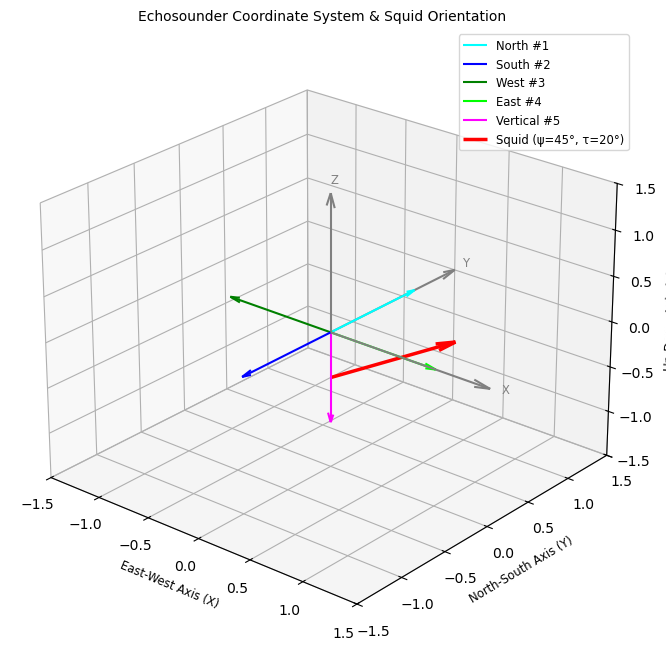

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 参数设置 ---
# 您可以修改这两个角度来看不同姿态下的鱿鱼位置
# 方向角 (Yaw, 0°=East, 90°=North)
psi_deg = 45
# 倾斜角 (Tilt, 正数=头朝上)
tau_deg = 20
# ---

# 将角度转换为弧度
psi = np.deg2rad(psi_deg)
tau = np.deg2rad(tau_deg)

# 创建3D绘图区域
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 1. 绘制世界坐标系轴
arrow_length = 1.5
ax.quiver(0, 0, 0, arrow_length, 0, 0, color='gray', arrow_length_ratio=0.1, label='East (+X)')
ax.quiver(0, 0, 0, 0, arrow_length, 0, color='gray', arrow_length_ratio=0.1, label='North (+Y)')
ax.quiver(0, 0, 0, 0, 0, arrow_length, color='gray', arrow_length_ratio=0.1, label='Up (+Z)')

# 2. 定义并绘制5个波束方向
beam_vectors = {
    'North #1': np.array([0, 1, 0]),
    'South #2': np.array([0, -1, 0]),
    'West #3': np.array([-1, 0, 0]),
    'East #4': np.array([1, 0, 0]),
    'Vertical #5': np.array([0, 0, -1])
}

beam_colors = {
    'North #1': 'cyan',
    'South #2': 'blue',
    'West #3': 'green',
    'East #4': 'lime',
    'Vertical #5': 'magenta'
}

for name, vec in beam_vectors.items():
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color=beam_colors[name], arrow_length_ratio=0.1, label=name)

# 3. 计算鱿鱼的姿态向量
squid_vector = np.array([
    np.cos(tau) * np.cos(psi),
    np.cos(tau) * np.sin(psi),
    np.sin(tau)
])

# 4. 绘制鱿鱼姿态向量
# 将鱿鱼箭头向下移动，使其起始点在 Z=-0.5
squid_start_z = -0.5
ax.quiver(0, 0, squid_start_z, squid_vector[0], squid_vector[1], squid_vector[2],
          color='red', linewidth=2.5, arrow_length_ratio=0.15, label=f'Squid (ψ={psi_deg}°, τ={tau_deg}°)')

# 5. 计算并打印入射角
print("-" * 40)
print(f"Calculated incidence angles for squid at:")
print(f"  - Yaw (ψ): {psi_deg}°")
print(f"  - Tilt (τ): {tau_deg}°")
print("-" * 40)

for name, vec in beam_vectors.items():
    # 计算点积. 使用 np.clip 避免浮点误差导致 arccos 定义域问题
    dot_product = np.clip(np.dot(vec, squid_vector), -1.0, 1.0)
    
    # 计算角度（弧度），然后转换为度
    angle_rad = np.arccos(dot_product)
    angle_deg = np.rad2deg(angle_rad)
    
    print(f"Incidence angle for {name:<12}: {angle_deg:.2f} degrees")

print("-" * 40)


# 6. 设置图表样式
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set_xlabel('East-West Axis (X)')
ax.set_ylabel('North-South Axis (Y)')
ax.set_zlabel('Up-Down Axis (Z)')
ax.set_title('Echosounder Coordinate System & Squid Orientation')
ax.legend()
ax.grid(True)

# 设置视角
ax.view_init(elev=25, azim=-50)

# 保存并显示图表
plt.savefig('coordinate_system_visualization.png', dpi=300)
print("图表已保存为 'coordinate_system_visualization.png'")
plt.show()

# GUI 展示界面-中文

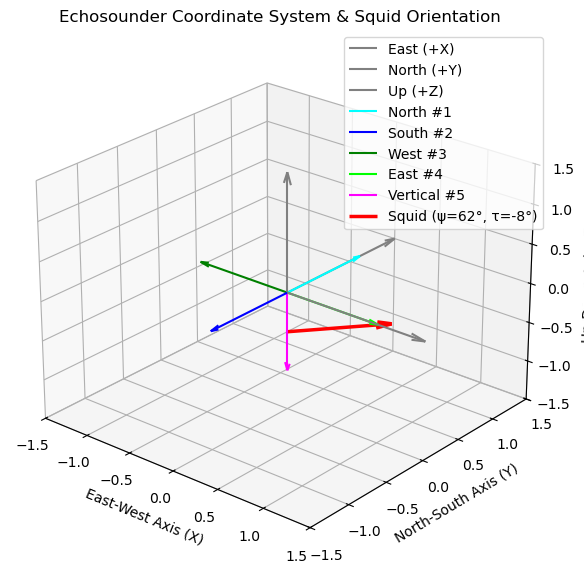

In [ ]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
from pathlib import Path

class SquidAngleGUI:
    def __init__(self, master):
        self.master = master
        master.title("鱿鱼姿态与声波入射角计算器V1.0 © Tong 2025")
        master.geometry("1000x750")

        # --- 创建主框架 ---
        main_frame = ttk.Frame(master, padding="10")
        main_frame.pack(fill=tk.BOTH, expand=True)

        # 控制区框架
        control_frame = ttk.LabelFrame(main_frame, text="控制参数", padding="10")
        control_frame.pack(side=tk.LEFT, fill=tk.Y, padx=(0, 10))

        # 图表区框架
        plot_frame = ttk.Frame(main_frame)
        plot_frame.pack(side=tk.RIGHT, fill=tk.BOTH, expand=True)

        # --- 创建控制组件 ---
        # 方向角 (Yaw)
        ttk.Label(control_frame, text="方向角 (Yaw ψ, 0-360°):").pack(pady=(0, 5))
        self.psi_slider = ttk.Scale(control_frame, from_=0, to=360, orient=tk.HORIZONTAL, length=200)
        self.psi_slider.set(45)
        self.psi_slider.pack(pady=(0, 10))
        self.psi_label = ttk.Label(control_frame, text=f"{self.psi_slider.get():.0f}°")
        self.psi_label.pack()
        self.psi_slider.config(command=lambda v: self.psi_label.config(text=f"{float(v):.0f}°"))

        # 倾斜角 (Tilt)
        ttk.Label(control_frame, text="倾斜角 (Tilt τ, -90-90°):").pack(pady=(10, 5))
        self.tau_slider = ttk.Scale(control_frame, from_=-90, to=90, orient=tk.HORIZONTAL, length=200)
        self.tau_slider.set(20)
        self.tau_slider.pack(pady=(0, 10))
        self.tau_label = ttk.Label(control_frame, text=f"{self.tau_slider.get():.0f}°")
        self.tau_label.pack()
        self.tau_slider.config(command=lambda v: self.tau_label.config(text=f"{float(v):.0f}°"))

        # Z轴位置
        ttk.Label(control_frame, text="鱿鱼Z轴位置:").pack(pady=(10, 5))
        self.z_pos_var = tk.StringVar(value="-0.5")
        self.z_pos_entry = ttk.Entry(control_frame, textvariable=self.z_pos_var, width=10)
        self.z_pos_entry.pack()

        # 更新按钮
        self.update_button = ttk.Button(control_frame, text="更新图表和计算", command=self.update_plot)
        self.update_button.pack(pady=20)

        # 结果显示区
        ttk.Label(control_frame, text="计算结果 (入射角):").pack(pady=(10, 5))
        self.result_text = tk.Text(control_frame, height=10, width=35, wrap="word")
        self.result_text.pack()

        # --- 创建Matplotlib图表 ---
        self.fig = plt.figure(figsize=(8, 7))
        self.ax = self.fig.add_subplot(111, projection='3d')
        self.canvas = FigureCanvasTkAgg(self.fig, master=plot_frame)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

        # 初始化图表
        self.update_plot()

    def update_plot(self):
        # 清空之前的绘图
        self.ax.clear()

        # 获取GUI输入值
        psi_deg = self.psi_slider.get()
        tau_deg = self.tau_slider.get()
        try:
            squid_start_z = float(self.z_pos_var.get())
        except ValueError:
            squid_start_z = 0.0 # 如果输入无效，则默认为0

        # 角度转弧度
        psi = np.deg2rad(psi_deg)
        tau = np.deg2rad(tau_deg)

        # 1. 绘制世界坐标系轴
        arrow_length = 1.5
        self.ax.quiver(0, 0, 0, arrow_length, 0, 0, color='gray', arrow_length_ratio=0.1) # 移除标签
        self.ax.quiver(0, 0, 0, 0, arrow_length, 0, color='gray', arrow_length_ratio=0.1) # 移除标签
        self.ax.quiver(0, 0, 0, 0, 0, arrow_length, color='gray', arrow_length_ratio=0.1) # 移除标签

        # 直接在轴箭头上添加X, Y, Z标签
        text_offset = 0.1 # 调整标签位置
        self.ax.text(arrow_length + text_offset, 0, 0, 'X', color='gray', fontsize='small')
        self.ax.text(0, arrow_length + text_offset, 0, 'Y', color='gray', fontsize='small')
        self.ax.text(0, 0, arrow_length + text_offset, 'Z', color='gray', fontsize='small')

        # 2. 定义并绘制5个波束方向
        beam_vectors = {
            'North #1': np.array([0, 1, 0]), 'South #2': np.array([0, -1, 0]),
            'West #3': np.array([-1, 0, 0]), 'East #4': np.array([1, 0, 0]),
            'Vertical #5': np.array([0, 0, -1])
        }
        beam_colors = {'North #1': 'cyan', 'South #2': 'blue', 'West #3': 'green', 'East #4': 'lime', 'Vertical #5': 'magenta'}
        for name, vec in beam_vectors.items():
            self.ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color=beam_colors[name], arrow_length_ratio=0.1, label=name)

        # 3. 计算并绘制鱿鱼姿态向量
        squid_vector = np.array([np.cos(tau) * np.cos(psi), np.cos(tau) * np.sin(psi), np.sin(tau)])
        self.ax.quiver(0, 0, squid_start_z, squid_vector[0], squid_vector[1], squid_vector[2],
                       color='red', linewidth=2.5, arrow_length_ratio=0.15, label=f'Squid (ψ={psi_deg:.0f}°, τ={tau_deg:.0f}°)')

        # 4. 计算并显示入射角
        self.result_text.delete(1.0, tk.END) # 清空文本框
        result_str = f"姿态: Yaw={psi_deg:.1f}°, Tilt={tau_deg:.1f}°\n" + "-"*30 + "\n"
        for name, vec in beam_vectors.items():
            dot_product = np.clip(np.dot(vec, squid_vector), -1.0, 1.0)
            angle_rad = np.arccos(dot_product)
            angle_deg = np.rad2deg(angle_rad)
            result_str += f"{name:<12}: {angle_deg:.2f} 度\n"
        self.result_text.insert(tk.END, result_str)

        # 5. 设置图表样式
        self.ax.set_xlim([-1.5, 1.5]); self.ax.set_ylim([-1.5, 1.5]); self.ax.set_zlim([-1.5, 1.5])
        self.ax.set_xlabel('East-West Axis (X)', fontsize='small'); self.ax.set_ylabel('North-South Axis (Y)', fontsize='small'); self.ax.set_zlabel('Up-Down Axis (Z)', fontsize='small')
        self.ax.set_title('Echosounder Coordinate System & Squid Orientation', fontsize='medium')
        self.ax.legend(fontsize='small') # 设置图例字体大小
        self.ax.grid(True)
        self.ax.view_init(elev=25, azim=-50)

        # 重新绘制画布
        self.canvas.draw()

if __name__ == '__main__':
    import os
    import sys

    def resource_path(relative_path):
        """ 获取资源的绝对路径，适用于开发环境和PyInstaller打包环境 """
        try:
            # PyInstaller 创建一个临时文件夹，并将路径存储在 _MEIPASS 中
            base_path = sys._MEIPASS
        except Exception:
            base_path = os.path.abspath(".")
        return os.path.join(base_path, relative_path)

    root = tk.Tk()
    try:
        # 显式设置窗口图标
        root.iconbitmap(resource_path('icon.ico'))
    except Exception as e:
        print(f"加载图标失败: {e}")
        
    app = SquidAngleGUI(root)
    root.mainloop()


# GUI English Ver 1.0- 入射角是0-180°，应该减90°

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Admin\anaconda3\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_20744\1085260170.py", line 27, in <lambda>
    self.psi_slider = ttk.Scale(control_frame, from_=0, to=360, orient=tk.HORIZONTAL, length=200, command=lambda v: self.update_plot())
                                                                                                                    ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_20744\1085260170.py", line 67, in update_plot
    self.psi_label.config(text=f"{self.psi_slider.get():.0f}°")
    ^^^^^^^^^^^^^^
AttributeError: 'SquidAngleGUI' object has no attribute 'psi_label'
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Admin\anaconda3\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
       

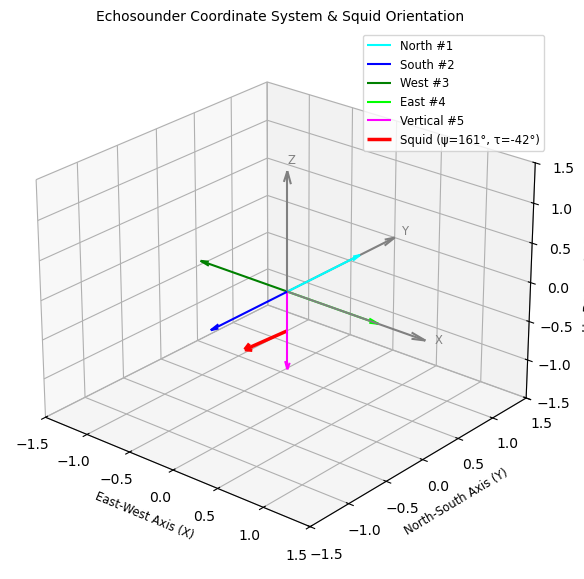

In [19]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
from pathlib import Path

class SquidAngleGUI:
    def __init__(self, master):
        self.master = master
        master.title("Squid Attitude & Acoustic Incidence Angle Calculator © Tong 2025")
        master.geometry("1000x750")

        # --- Main Frames ---
        main_frame = ttk.Frame(master, padding="10")
        main_frame.pack(fill=tk.BOTH, expand=True)

        control_frame = ttk.LabelFrame(main_frame, text="Control Parameters", padding="10")
        control_frame.pack(side=tk.LEFT, fill=tk.Y, padx=(0, 10))

        plot_frame = ttk.Frame(main_frame)
        plot_frame.pack(side=tk.RIGHT, fill=tk.BOTH, expand=True)

        # --- Control Widgets ---
        # Yaw
        ttk.Label(control_frame, text="Direction (Yaw ψ, 0-360°):").pack(pady=(0, 5))
        self.psi_slider = ttk.Scale(control_frame, from_=0, to=360, orient=tk.HORIZONTAL, length=200, command=lambda v: self.update_plot())
        self.psi_slider.set(45)
        self.psi_slider.pack(pady=(0, 10))
        self.psi_label = ttk.Label(control_frame, text=f"{self.psi_slider.get():.0f}°")
        self.psi_label.pack()

        # Tilt
        ttk.Label(control_frame, text="Tilt (Tilt τ, -90-90°):").pack(pady=(10, 5))
        self.tau_slider = ttk.Scale(control_frame, from_=-90, to=90, orient=tk.HORIZONTAL, length=200, command=lambda v: self.update_plot())
        self.tau_slider.set(20)
        self.tau_slider.pack(pady=(0, 10))
        self.tau_label = ttk.Label(control_frame, text=f"{self.tau_slider.get():.0f}°")
        self.tau_label.pack()

        # Z-Position
        ttk.Label(control_frame, text="Squid Z-axis Position:").pack(pady=(10, 5))
        self.z_pos_var = tk.StringVar(value="-0.5")
        self.z_pos_entry = ttk.Entry(control_frame, textvariable=self.z_pos_var, width=10)
        self.z_pos_entry.pack()

        # Update Button (still useful for Z-pos entry)
        self.update_button = ttk.Button(control_frame, text="Update Plot & Calculate", command=self.update_plot)
        self.update_button.pack(pady=20)

        # Results Display
        ttk.Label(control_frame, text="Calculation Results (Incidence Angles):").pack(pady=(10, 5))
        self.result_text = tk.Text(control_frame, height=10, width=35, wrap="word")
        self.result_text.pack()

        # --- Matplotlib Chart ---
        self.fig = plt.figure(figsize=(8, 7))
        self.ax = self.fig.add_subplot(111, projection='3d')
        self.canvas = FigureCanvasTkAgg(self.fig, master=plot_frame)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

        # Initial plot
        self.update_plot()

    def update_plot(self, event=None):
        # Update slider labels
        self.psi_label.config(text=f"{self.psi_slider.get():.0f}°")
        self.tau_label.config(text=f"{self.tau_slider.get():.0f}°")
        
        self.ax.clear()

        psi_deg = self.psi_slider.get()
        tau_deg = self.tau_slider.get()
        try:
            squid_start_z = float(self.z_pos_var.get())
        except ValueError:
            squid_start_z = 0.0

        psi = np.deg2rad(psi_deg)
        tau = np.deg2rad(tau_deg)

        # 1. World coordinate system axes
        arrow_length = 1.5
        self.ax.quiver(0, 0, 0, arrow_length, 0, 0, color='gray', arrow_length_ratio=0.1)
        self.ax.quiver(0, 0, 0, 0, arrow_length, 0, color='gray', arrow_length_ratio=0.1)
        self.ax.quiver(0, 0, 0, 0, 0, arrow_length, color='gray', arrow_length_ratio=0.1)

        text_offset = 0.1
        self.ax.text(arrow_length + text_offset, 0, 0, 'X', color='gray', fontsize='small')
        self.ax.text(0, arrow_length + text_offset, 0, 'Y', color='gray', fontsize='small')
        self.ax.text(0, 0, arrow_length + text_offset, 'Z', color='gray', fontsize='small')

        # 2. Beam vectors
        beam_vectors = {
            'North #1': np.array([0, 1, 0]), 'South #2': np.array([0, -1, 0]),
            'West #3': np.array([-1, 0, 0]), 'East #4': np.array([1, 0, 0]),
            'Vertical #5': np.array([0, 0, -1])
        }
        beam_colors = {'North #1': 'cyan', 'South #2': 'blue', 'West #3': 'green', 'East #4': 'lime', 'Vertical #5': 'magenta'}
        for name, vec in beam_vectors.items():
            self.ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color=beam_colors[name], arrow_length_ratio=0.1, label=name)

        # 3. Squid attitude vector
        squid_vector = np.array([np.cos(tau) * np.cos(psi), np.cos(tau) * np.sin(psi), np.sin(tau)])
        self.ax.quiver(0, 0, squid_start_z, squid_vector[0], squid_vector[1], squid_vector[2],
                       color='red', linewidth=2.5, arrow_length_ratio=0.15, label=f'Squid (ψ={psi_deg:.0f}°, τ={tau_deg:.0f}°)')

        # 4. Calculate and display incidence angles
        self.result_text.delete(1.0, tk.END)
        result_str = f"Attitude: Yaw={psi_deg:.1f}°, Tilt={tau_deg:.1f}°\n" + "-"*30 + "\n"
        for name, vec in beam_vectors.items():
            dot_product = np.clip(np.dot(vec, squid_vector), -1.0, 1.0)
            angle_rad = np.arccos(dot_product)
            angle_deg = np.rad2deg(angle_rad)
            result_str += f"{name:<12}: {angle_deg:.2f} degrees\n"
        self.result_text.insert(tk.END, result_str)

        # 5. Chart styling
        self.ax.set_xlim([-1.5, 1.5]); self.ax.set_ylim([-1.5, 1.5]); self.ax.set_zlim([-1.5, 1.5])
        self.ax.set_xlabel('East-West Axis (X)', fontsize='small'); self.ax.set_ylabel('North-South Axis (Y)', fontsize='small'); self.ax.set_zlabel('Up-Down Axis (Z)', fontsize='small')
        self.ax.set_title('Echosounder Coordinate System & Squid Orientation', fontsize='medium')
        self.ax.legend(fontsize='small')
        self.ax.grid(True)
        self.ax.view_init(elev=25, azim=-50)

        self.canvas.draw()

if __name__ == '__main__':
    import os
    import sys

    def resource_path(relative_path):
        """ Get absolute path to resource, works for dev and for PyInstaller """
        try:
            base_path = sys._MEIPASS
        except Exception:
            base_path = os.path.abspath(".")
        return os.path.join(base_path, relative_path)

    root = tk.Tk()
    try:
        root.iconbitmap(resource_path('icon.ico'))
    except Exception as e:
        print(f"Failed to load icon: {e}")
        
    app = SquidAngleGUI(root)
    root.mainloop()


# GUI English Ver 1.1- 入射角改成-90°到90°

In [ ]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
from pathlib import Path

class SquidAngleGUI:
    def __init__(self, master):
        self.master = master
        master.title("Squid Attitude & Acoustic Incidence Angle Calculator V1.1 © Tong 2025")
        master.geometry("1000x750")

        # --- Main Frames ---
        main_frame = ttk.Frame(master, padding="10")
        main_frame.pack(fill=tk.BOTH, expand=True)

        control_frame = ttk.LabelFrame(main_frame, text="Control Parameters", padding="10")
        control_frame.pack(side=tk.LEFT, fill=tk.Y, padx=(0, 10))

        plot_frame = ttk.Frame(main_frame)
        plot_frame.pack(side=tk.RIGHT, fill=tk.BOTH, expand=True)

        # --- Control Widgets ---
        # Yaw
        ttk.Label(control_frame, text="Direction (Yaw ψ, 0-360°):").pack(pady=(0, 5))
        self.psi_slider = ttk.Scale(control_frame, from_=0, to=360, orient=tk.HORIZONTAL, length=200, command=lambda v: self.update_plot())
        self.psi_slider.set(45)
        self.psi_slider.pack(pady=(0, 10))
        self.psi_label = ttk.Label(control_frame, text=f"{self.psi_slider.get():.0f}°")
        self.psi_label.pack()

        # Tilt
        ttk.Label(control_frame, text="Tilt (Tilt τ, -90-90°):").pack(pady=(10, 5))
        self.tau_slider = ttk.Scale(control_frame, from_=-90, to=90, orient=tk.HORIZONTAL, length=200, command=lambda v: self.update_plot())
        self.tau_slider.set(20)
        self.tau_slider.pack(pady=(0, 10))
        self.tau_label = ttk.Label(control_frame, text=f"{self.tau_slider.get():.0f}°")
        self.tau_label.pack()

        # Z-Position
        ttk.Label(control_frame, text="Squid Z-axis Position:").pack(pady=(10, 5))
        self.z_pos_var = tk.StringVar(value="-0.5")
        self.z_pos_entry = ttk.Entry(control_frame, textvariable=self.z_pos_var, width=10)
        self.z_pos_entry.pack()

        # Update Button (still useful for Z-pos entry)
        self.update_button = ttk.Button(control_frame, text="Update Plot & Calculate", command=self.update_plot)
        self.update_button.pack(pady=20)

        # Results Display
        ttk.Label(control_frame, text="Calculation Results (Incidence Angles):").pack(pady=(10, 5))
        self.result_text = tk.Text(control_frame, height=10, width=35, wrap="word")
        self.result_text.pack()

        # --- Matplotlib Chart ---
        self.fig = plt.figure(figsize=(8, 7))
        self.ax = self.fig.add_subplot(111, projection='3d')
        self.canvas = FigureCanvasTkAgg(self.fig, master=plot_frame)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

        # Initial plot
        self.update_plot()

    def update_plot(self, event=None):
        # Update slider labels
        self.psi_label.config(text=f"{self.psi_slider.get():.0f}°")
        self.tau_label.config(text=f"{self.tau_slider.get():.0f}°")
        
        self.ax.clear()

        psi_deg = self.psi_slider.get()
        tau_deg = self.tau_slider.get()
        try:
            squid_start_z = float(self.z_pos_var.get())
        except ValueError:
            squid_start_z = 0.0

        psi = np.deg2rad(psi_deg)
        tau = np.deg2rad(tau_deg)

        # 1. World coordinate system axes
        arrow_length = 1.5
        self.ax.quiver(0, 0, 0, arrow_length, 0, 0, color='gray', arrow_length_ratio=0.1)
        self.ax.quiver(0, 0, 0, 0, arrow_length, 0, color='gray', arrow_length_ratio=0.1)
        self.ax.quiver(0, 0, 0, 0, 0, arrow_length, color='gray', arrow_length_ratio=0.1)

        text_offset = 0.1
        self.ax.text(arrow_length + text_offset, 0, 0, 'X', color='gray', fontsize='small')
        self.ax.text(0, arrow_length + text_offset, 0, 'Y', color='gray', fontsize='small')
        self.ax.text(0, 0, arrow_length + text_offset, 'Z', color='gray', fontsize='small')

        # 2. Beam vectors
        beam_vectors = {
            'North #1': np.array([0, 1, 0]), 'South #2': np.array([0, -1, 0]),
            'West #3': np.array([-1, 0, 0]), 'East #4': np.array([1, 0, 0]),
            'Vertical #5': np.array([0, 0, -1])
        }
        beam_colors = {'North #1': 'cyan', 'South #2': 'blue', 'West #3': 'green', 'East #4': 'lime', 'Vertical #5': 'magenta'}
        for name, vec in beam_vectors.items():
            self.ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color=beam_colors[name], arrow_length_ratio=0.1, label=name)

        # 3. Squid attitude vector
        squid_vector = np.array([np.cos(tau) * np.cos(psi), np.cos(tau) * np.sin(psi), np.sin(tau)])
        self.ax.quiver(0, 0, squid_start_z, squid_vector[0], squid_vector[1], squid_vector[2],
                       color='red', linewidth=2.5, arrow_length_ratio=0.15, label=f'Squid (ψ={psi_deg:.0f}°, τ={tau_deg:.0f}°)')

        # 4. Calculate and display incidence angles
        self.result_text.delete(1.0, tk.END)
        result_str = f"Attitude: Yaw={psi_deg:.1f}°, Tilt={tau_deg:.1f}°\n" + "-"*30 + "\n"
        for name, vec in beam_vectors.items():
            dot_product = np.clip(np.dot(vec, squid_vector), -1.0, 1.0)
            angle_rad = np.arccos(dot_product)
            angle_deg = np.rad2deg(angle_rad) - 90.0
            result_str += f"{name:<12}: {angle_deg:.2f} degrees\n"
        self.result_text.insert(tk.END, result_str)

        # 5. Chart styling
        self.ax.set_xlim([-1.5, 1.5]); self.ax.set_ylim([-1.5, 1.5]); self.ax.set_zlim([-1.5, 1.5])
        self.ax.set_xlabel('East-West Axis (X)', fontsize='small'); self.ax.set_ylabel('North-South Axis (Y)', fontsize='small'); self.ax.set_zlabel('Up-Down Axis (Z)', fontsize='small')
        self.ax.set_title('Echosounder Coordinate System & Squid Orientation', fontsize='medium')
        self.ax.legend(fontsize='small')
        self.ax.grid(True)
        self.ax.view_init(elev=25, azim=-50)

        self.canvas.draw()

if __name__ == '__main__':
    import os
    import sys

    def resource_path(relative_path):
        """ Get absolute path to resource, works for dev and for PyInstaller """
        try:
            base_path = sys._MEIPASS
        except Exception:
            base_path = os.path.abspath(".")
        return os.path.join(base_path, relative_path)

    root = tk.Tk()
    try:
        root.iconbitmap(resource_path('icon.ico'))
    except Exception as e:
        print(f"Failed to load icon: {e}")
        
    app = SquidAngleGUI(root)
    root.mainloop()


# TS_squid
TS 数据分析，读取实验结果保存的nc文件，进行分析

In [4]:

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

file_path = 'processed_squid_ts_fix.nc'
ds = xr.open_dataset(file_path)

# --- 1. 打印NetCDF数据结构 ---
print("--- 数据集结构预览 ---")
print(ds)
print("\n" + "="*50 + "\n")

--- 数据集结构预览 ---
<xarray.Dataset> Size: 624kB
Dimensions:       (squid_id: 2, system_freq: 2, frequency: 231, angle: 83)
Coordinates:
  * squid_id      (squid_id) <U3 24B 'No1' 'No2'
  * system_freq   (system_freq) int32 8B 70 120
  * frequency     (frequency) float64 2kB 50.0 50.5 51.01 ... 169.0 169.5 170.0
  * angle         (angle) float64 664B -60.0 -59.0 -58.0 ... 18.0 19.0 20.0
    ML_cm         (squid_id) float64 16B ...
    Weight_g      (squid_id) float64 16B ...
Data variables:
    TS            (squid_id, system_freq, frequency, angle) float64 614kB ...
    TS_0_deg_std  (squid_id, system_freq, frequency) float64 7kB ...
Attributes:
    description:   鱿鱼(Squid)目标强度(TS)实测数据。包含两条鱿鱼在两个宽频系统下的测量结果。
    source_files:  ['TS_120_No1.xlsx', 'TS_120_No2.xlsx', 'TS_70_No1.xlsx', '...




In [8]:
print(ds.squid_id.dtype)      # 大概率输出 |U3 或 object

<U3


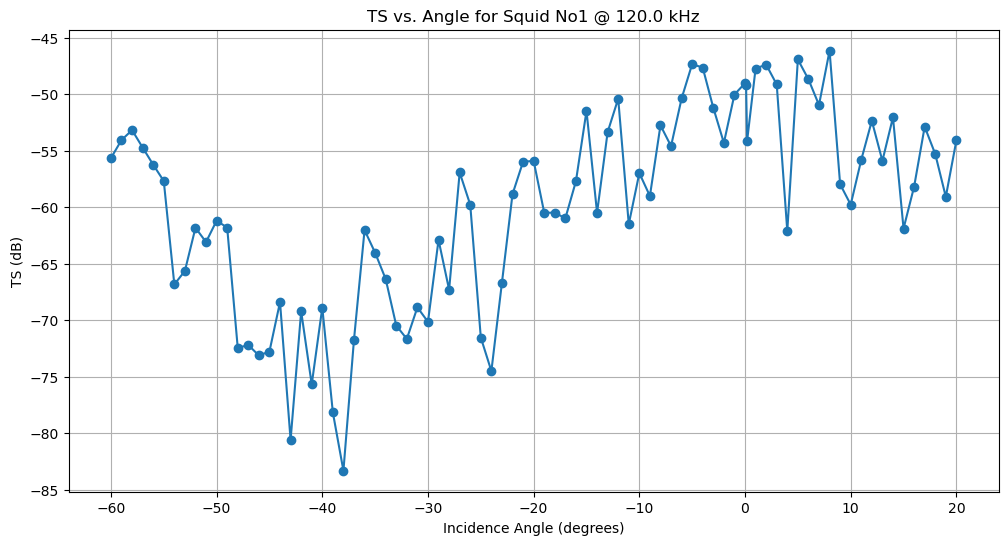

In [9]:
# --------- 参数 ----------
SQUID_ID_A    = 'No1'
SYSTEM_FREQ_A = 120
TARGET_FREQ_A = 120          # 想画的目标频率（kHz）
# -------------------------

# 1. 先精确匹配字符串维度，再对数值维度用 nearest
ts_data_A = (
    ds['TS']
    .sel(squid_id=SQUID_ID_A, system_freq=SYSTEM_FREQ_A)            # 精确
    .sel(frequency=TARGET_FREQ_A, method='nearest')                 # nearest 只作用于 frequency
    .sortby('angle')                                                # 按角度排序
)

# 2. 绘图
plt.figure(figsize=(12, 6))
ts_data_A.plot.line(x='angle', marker='o', linestyle='-')

# 3. 图表装饰
plt.title(f'TS vs. Angle for Squid {SQUID_ID_A} @ {ts_data_A.frequency.item():.1f} kHz')
plt.xlabel('Incidence Angle (degrees)')
plt.ylabel('TS (dB)')
plt.grid(True)
plt.show()

--- 数据集结构预览 ---
<xarray.Dataset> Size: 624kB
Dimensions:       (squid_id: 2, system_freq: 2, frequency: 231, angle: 83)
Coordinates:
  * squid_id      (squid_id) <U3 24B 'No1' 'No2'
  * system_freq   (system_freq) int32 8B 70 120
  * frequency     (frequency) float64 2kB 50.0 50.5 51.01 ... 169.0 169.5 170.0
  * angle         (angle) float64 664B -60.0 -59.0 -58.0 ... 18.0 19.0 20.0
    ML_cm         (squid_id) float64 16B ...
    Weight_g      (squid_id) float64 16B ...
Data variables:
    TS            (squid_id, system_freq, frequency, angle) float64 614kB ...
    TS_0_deg_std  (squid_id, system_freq, frequency) float64 7kB ...
Attributes:
    description:   鱿鱼(Squid)目标强度(TS)实测数据。包含两条鱿鱼在两个宽频系统下的测量结果。
    source_files:  ['TS_120_No1.xlsx', 'TS_120_No2.xlsx', 'TS_70_No1.xlsx', '...


正在生成图表1: TS vs. Angle...


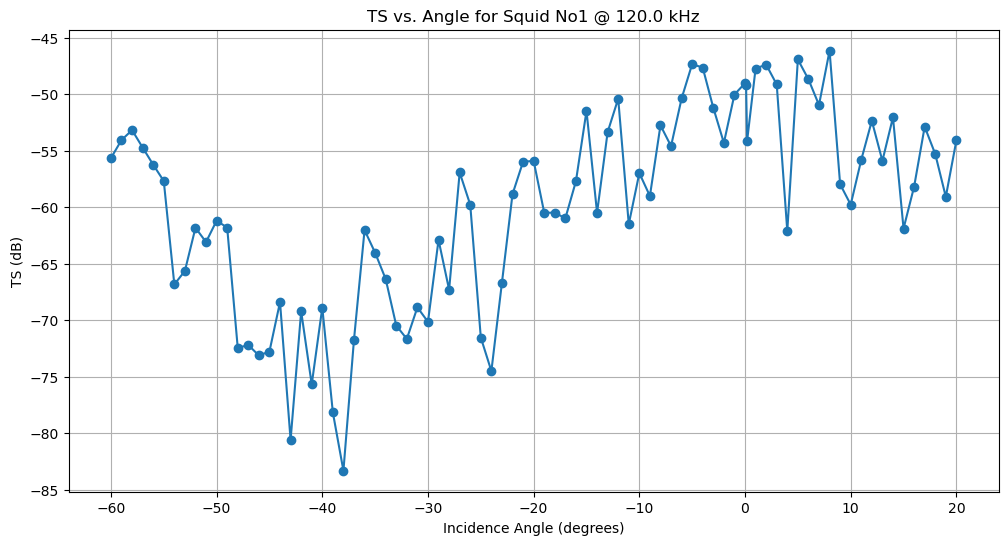

正在生成图表2: TS vs. Frequency...


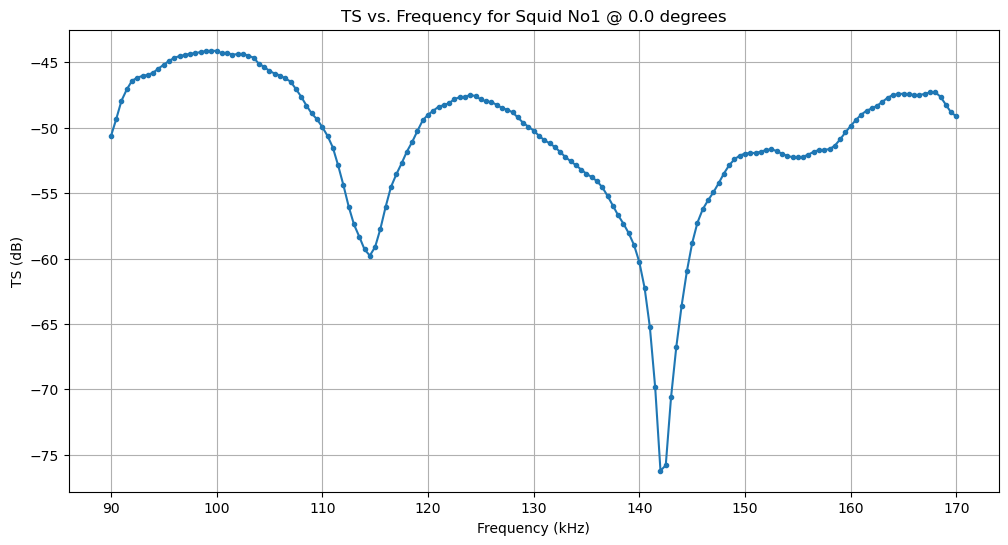

正在生成图表3: 2D Heatmap...


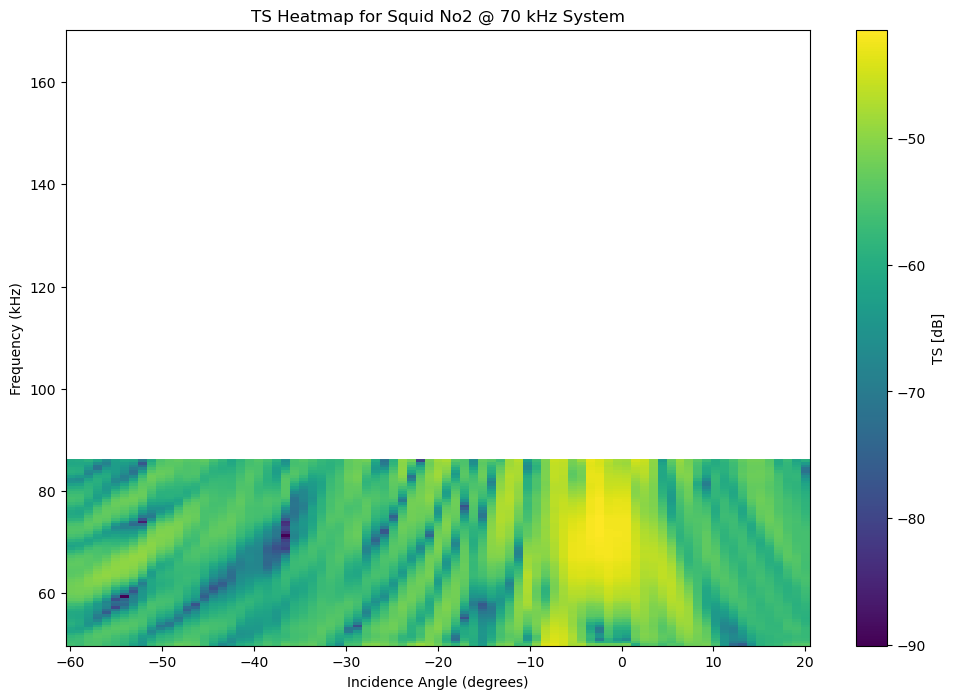

In [10]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

def analyze_and_plot():
    """
    加载和分析由 process_ts_data.py 脚本生成的 processed_squid_ts.nc 文件，
    并生成三个示例图表。
    """
    try:
        file_path = 'processed_squid_ts.nc'
        ds = xr.open_dataset(file_path)
    except FileNotFoundError:
        print(f"错误: 未找到文件 '{file_path}'。")
        print("请先运行 'process_ts_data.py' 来生成该文件。")
        return

    # --- 1. 打印NetCDF数据结构 ---
    print("--- 数据集结构预览 ---")
    print(ds)
    print("\n" + "="*50 + "\n")

    # --- 2. 绘图示例 A: TS vs. 入射角 ---
    print("正在生成图表1: TS vs. Angle...")
    try:
        SQUID_ID_A = 'No1'
        SYSTEM_FREQ_A = 120
        TARGET_FREQ_A = 120

        # 先精确匹配字符串维度，再对数值维度用 nearest
        ts_data_A = (
            ds['TS']
            .sel(squid_id=SQUID_ID_A, system_freq=SYSTEM_FREQ_A)
            .sel(frequency=TARGET_FREQ_A, method='nearest')
            .sortby('angle')
        )

        plt.figure(figsize=(12, 6))
        ts_data_A.plot.line(x='angle', marker='o', linestyle='-')
        plt.title(f'TS vs. Angle for Squid {SQUID_ID_A} @ {ts_data_A.frequency.item():.1f} kHz')
        plt.xlabel('Incidence Angle (degrees)')
        plt.ylabel('TS (dB)')
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"绘制图表1时出错: {e}")

    # --- 3. 绘图示例 B: TS vs. 频率 (频率响应) ---
    print("正在生成图表2: TS vs. Frequency...")
    try:
        SQUID_ID_B = 'No1'
        SYSTEM_FREQ_B = 120
        TARGET_ANGLE_B = 0

        ts_data_B = (
            ds['TS']
            .sel(squid_id=SQUID_ID_B, system_freq=SYSTEM_FREQ_B)
            .sel(angle=TARGET_ANGLE_B, method='nearest')
            .sortby('frequency')
        )

        plt.figure(figsize=(12, 6))
        ts_data_B.plot.line(x='frequency', marker='.')
        plt.title(f'TS vs. Frequency for Squid {SQUID_ID_B} @ {ts_data_B.angle.item():.1f} degrees')
        plt.xlabel('Frequency (kHz)')
        plt.ylabel('TS (dB)')
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"绘制图表2时出错: {e}")

    # --- 4. 绘图示例 C: 2D热力图 (TS vs. 频率 vs. 角度) ---
    print("正在生成图表3: 2D Heatmap...")
    try:
        SQUID_ID_C = 'No2'
        SYSTEM_FREQ_C = 70

        ts_data_C = (
            ds['TS']
            .sel(squid_id=SQUID_ID_C, system_freq=SYSTEM_FREQ_C)
            .sortby('angle')
            .sortby('frequency')
        )

        plt.figure(figsize=(12, 8))
        ts_data_C.plot.imshow(x='angle', y='frequency', cmap='viridis')
        plt.title(f'TS Heatmap for Squid {SQUID_ID_C} @ {SYSTEM_FREQ_C} kHz System')
        plt.xlabel('Incidence Angle (degrees)')
        plt.ylabel('Frequency (kHz)')
        plt.show()
    except Exception as e:
        print(f"绘制图表3时出错: {e}")


if __name__ == '__main__':
    analyze_and_plot()

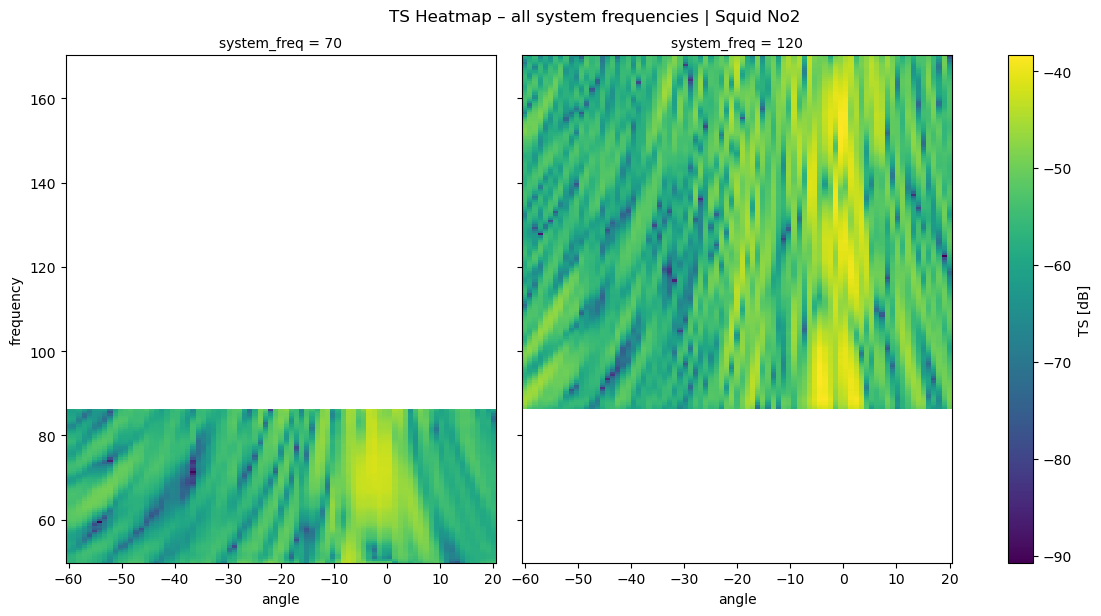

In [19]:
# 1. 选取数据（保留 system_freq 维度）
ts_all = (
    ds['TS']
    .sel(squid_id='No2')                       # 想看哪条鱿鱼
    .sortby('angle')
    .sortby('frequency')
)

g = ts_all.plot.imshow(
    x='angle',
    y='frequency',
    col='system_freq',   # ← 按中心频率分面
    col_wrap=2,          # 每行 2 个子图
    figsize=(12, 6),
    cmap='viridis'
)
g.fig.suptitle('TS Heatmap – all system frequencies | Squid No2', y=1.02)
plt.show()

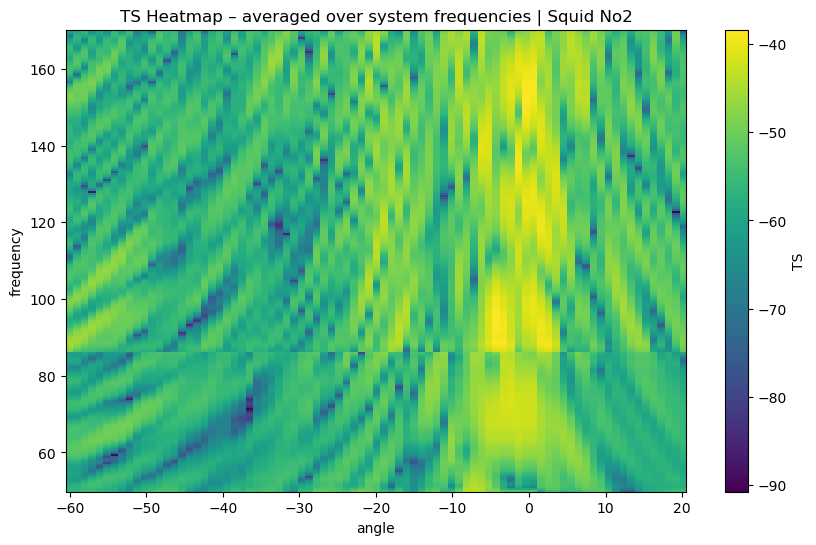

In [17]:
ts_mean_sys = (
    ds['TS']
    .sel(squid_id='No2')
    .mean(dim='system_freq')   # ← 把中心频率维度平均掉
    .sortby('angle')
    .sortby('frequency')
)

plt.figure(figsize=(10, 6))
ts_mean_sys.plot.imshow(
    x='angle',
    y='frequency',
    cmap='viridis'
)
plt.title('TS Heatmap – averaged over system frequencies | Squid No2')
plt.show()

In [27]:
print(ds['TS'])
print(ds['TS'].dims)
print(ds['TS'].coords)


<xarray.DataArray 'TS' (squid_id: 2, system_freq: 2, frequency: 231, angle: 83)> Size: 614kB
[76692 values with dtype=float64]
Coordinates:
  * squid_id     (squid_id) <U3 24B 'No1' 'No2'
  * system_freq  (system_freq) int32 8B 70 120
  * frequency    (frequency) float64 2kB 50.0 50.5 51.01 ... 169.0 169.5 170.0
  * angle        (angle) float64 664B -60.0 -59.0 -58.0 -57.0 ... 18.0 19.0 20.0
    ML_cm        (squid_id) float64 16B ...
    Weight_g     (squid_id) float64 16B ...
Attributes:
    units:        dB
    description:  目标强度(Target Strength)。0度入射角的值是3次重复测量的平均值。
('squid_id', 'system_freq', 'frequency', 'angle')
Coordinates:
  * squid_id     (squid_id) <U3 24B 'No1' 'No2'
  * system_freq  (system_freq) int32 8B 70 120
  * frequency    (frequency) float64 2kB 50.0 50.5 51.01 ... 169.0 169.5 170.0
  * angle        (angle) float64 664B -60.0 -59.0 -58.0 -57.0 ... 18.0 19.0 20.0
    ML_cm        (squid_id) float64 16B ...
    Weight_g     (squid_id) float64 16B ...


In [37]:
ts_long.dims


('angle', 'y')

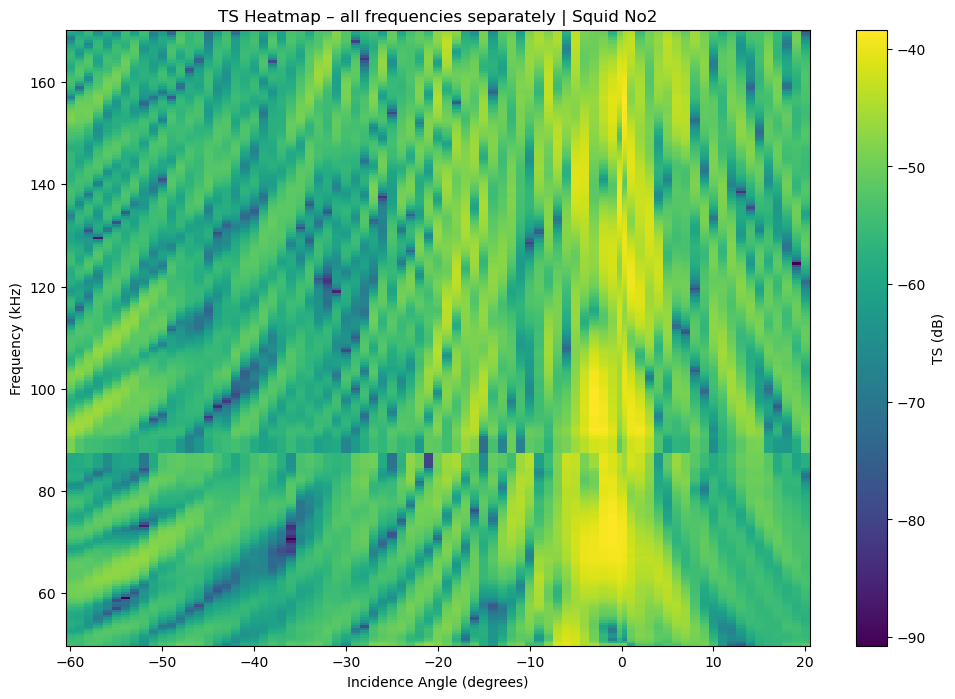

In [56]:
import matplotlib.pyplot as plt

ts = ds['TS'].sel(squid_id='No2')

plt.figure(figsize=(12, 8))

for sf in ts['system_freq'].values:
    ts_sf = ts.sel(system_freq=sf)
    # 纵轴直接用 frequency
    ts_plot = ts_sf.transpose('frequency','angle')
    
    plt.pcolormesh(
        ts_plot['angle'],
        ts_plot['frequency'],
        ts_plot,
        shading='auto',
        cmap='viridis'
    )

plt.title('TS Heatmap – all frequencies separately | Squid No2')
plt.xlabel('Incidence Angle (degrees)')
plt.ylabel('Frequency (kHz)')
plt.colorbar(label='TS (dB)')
plt.show()


# 平滑插值

C:\Users\Admin\AppData\Local\Temp\ipykernel_15392\1818731141.py:26: FutureWarning: In a future version of xarray the default value for coords will change from coords='different' to coords='minimal'. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set coords explicitly.
  ts_all = xr.concat(ts_interp_list, dim='frequency')


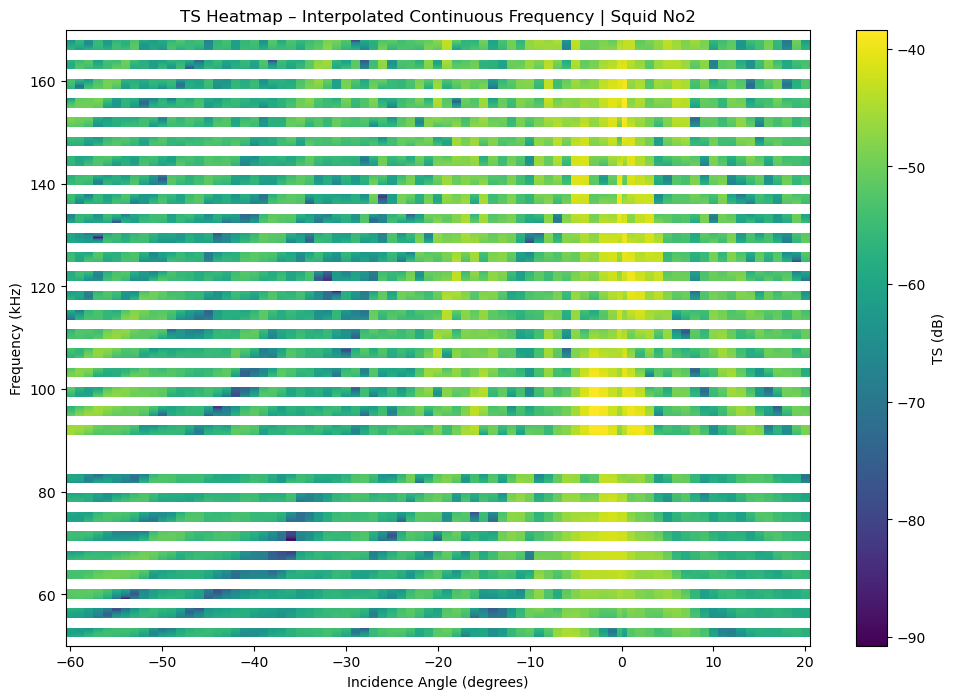

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# 1. 选择特定 squid

ts = ds['TS'].sel(squid_id='No2')  # dims = (system_freq, frequency, angle)

# 2. 生成统一频率网格（平滑插值）

freq_min = ts['frequency'].min().values
freq_max = ts['frequency'].max().values
freq_step = 0.1  # kHz，可根据需求调整
freq_new = np.arange(freq_min, freq_max + freq_step, freq_step)

# 3. 对每个 system_freq 插值

ts_interp_list = []
for sf in ts['system_freq'].values:
    ts_sf = ts.sel(system_freq=sf).transpose('frequency', 'angle')  # dims=(frequency, angle)
    ts_sf_interp = ts_sf.interp(frequency=freq_new, method='linear')
    ts_interp_list.append(ts_sf_interp)

# 4. 合并两个系统频率

ts_all = xr.concat(ts_interp_list, dim='frequency')
ts_all = ts_all.sortby('frequency')  # 确保频率从低到高

# 5. 绘图

plt.figure(figsize=(12, 8))
pcm = plt.pcolormesh(
ts_all['angle'],
ts_all['frequency'],
ts_all,
shading='auto',
cmap='viridis'
)
plt.xlabel('Incidence Angle (degrees)')
plt.ylabel('Frequency (kHz)')
plt.title('TS Heatmap – Interpolated Continuous Frequency | Squid No2')
plt.colorbar(pcm, label='TS (dB)')
plt.show()


# 插值绘图，OK

C:\Users\Admin\AppData\Local\Temp\ipykernel_17780\2742749354.py:14: FutureWarning: In a future version of xarray the default value for coords will change from coords='different' to coords='minimal'. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set coords explicitly.
  ts_combined = xr.concat([ts.sel(system_freq=sf) for sf in ts['system_freq'].values], dim='frequency')


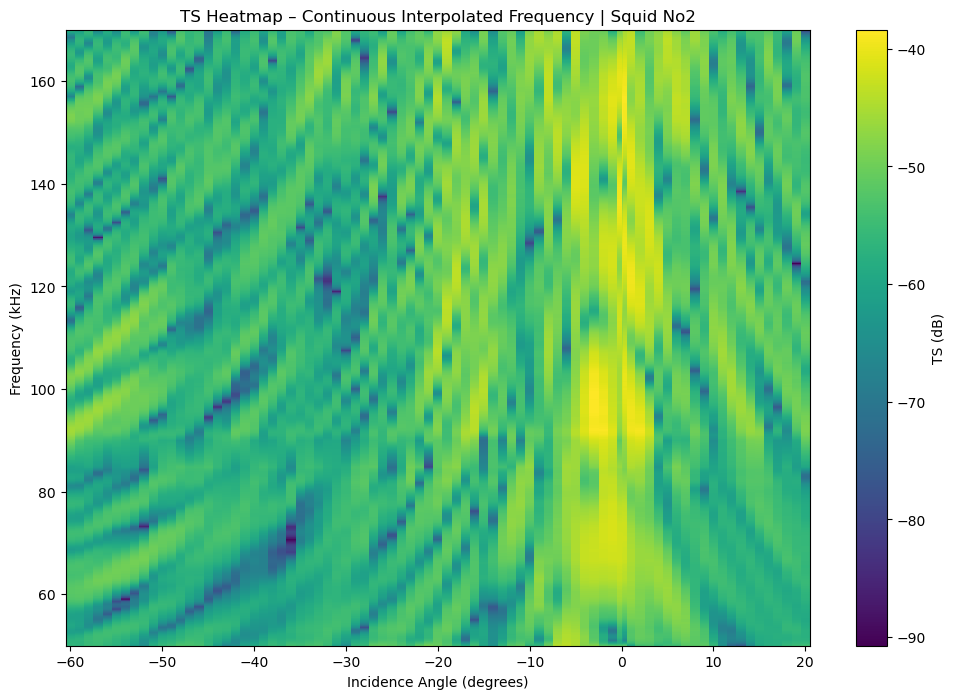

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

file_path = 'processed_squid_ts.nc'
ds = xr.open_dataset(file_path)

# 1. 选择特定 squid

ts = ds['TS'].sel(squid_id='No2')  # dims = (system_freq, frequency, angle)

# 2. 合并两个系统频率的数据

ts_combined = xr.concat([ts.sel(system_freq=sf) for sf in ts['system_freq'].values], dim='frequency')

# 3. 转为 DataFrame，只保留 TS 值

ts_df = ts_combined.to_dataframe(name='TS')[['TS']].reset_index()

# 4. 对重复频率取平均（按每个 angle）

ts_df = ts_df.groupby(['frequency', 'angle']).mean().reset_index()

# 5. 转回 xarray

ts_unique = ts_df.set_index(['frequency','angle']).to_xarray()['TS']

# 6. 生成统一频率网格并插值

freq_min = ts_unique['frequency'].min().values
freq_max = ts_unique['frequency'].max().values
freq_step = 0.1  # kHz，可调
freq_new = np.arange(freq_min, freq_max + freq_step, freq_step)

ts_interp = ts_unique.interp(frequency=freq_new, method='linear')

# 7. 转置维度以便绘图 (frequency, angle)

ts_plot = ts_interp.transpose('frequency','angle')

# 8. 绘图

plt.figure(figsize=(12, 8))
pcm = plt.pcolormesh(
ts_plot['angle'],
ts_plot['frequency'],
ts_plot,
shading='auto',
cmap='viridis'
)
plt.xlabel('Incidence Angle (degrees)')
plt.ylabel('Frequency (kHz)')
plt.title('TS Heatmap – Continuous Interpolated Frequency | Squid No2')
plt.colorbar(pcm, label='TS (dB)')
plt.show()


# 对TS数据按0.1kHz进行插值
数据格式建议

维度 (dims)：

squid_id: 标识不同鱿鱼，例如 "No1"、"No2"。

frequency: 统一频率网格，0.1 kHz 步长。

angle: 入射角度，原始 angle 维度。

变量 (variables)：

TS[squid_id, frequency, angle]: 插值后的目标强度数据。

坐标 (coordinates)：

squid_id (长度 = 2)

frequency (长度 = 根据 freq_min、freq_max 和步长)

angle (长度 = 原始角度数，例如 83)

属性 (attributes)：

units: dB

description: "Interpolated Target Strength (TS) at 0.1 kHz step"

## 插值数据保存方法1

In [19]:
import numpy as np
import xarray as xr

file_path = "processed_squid_ts.nc"
ds = xr.open_dataset(file_path)

squid_ids = ds["squid_id"].values
result_list = []

for squid in squid_ids:
    print("Processing", squid)

    # 1. 取该 squid 的 TS 数据
    ts = ds["TS"].sel(squid_id=squid)   # dims = (system_freq, frequency, angle)

    # 2. 合并所有 system_freq，直接在 frequency 维度拼接
    ts_combined = xr.concat([ts.sel(system_freq=sf) for sf in ts["system_freq"].values],
                            dim="frequency")

    # 3. 转 DataFrame
    ts_df = ts_combined.to_dataframe(name='TS')[['TS']].reset_index()

    # 4. 对 (frequency, angle) 去重并求平均
    ts_df = ts_df.groupby(["frequency", "angle"]).mean().reset_index()

    # 5. 转回 xarray
    ts_unique = ts_df.set_index(["frequency", "angle"]).to_xarray()["TS"]

    # 6. 创建统一频率网格 (0.1 kHz)
    freq_min = float(ts_unique["frequency"].min())
    freq_max = float(ts_unique["frequency"].max())
    freq_new = np.arange(freq_min, freq_max + 0.1, 0.1)

    # 7. 插值
    ts_interp = ts_unique.interp(frequency=freq_new, method="linear")

    # 8. 加上 squid_id 维度
    ts_interp = ts_interp.expand_dims({"squid_id": [squid]})

    result_list.append(ts_interp)

# 9. 合并所有 squid
ts_all = xr.concat(result_list, dim="squid_id")

# 10. 保存为新的 nc 文件
output_path = "TS_interpolated_0p1kHz.nc"
ts_all.to_netcdf(output_path)

print("Saved:", output_path)


Processing No1
Processing No2
Saved: TS_interpolated_0p1kHz.nc


C:\Users\Admin\AppData\Local\Temp\ipykernel_17780\1204172951.py:17: FutureWarning: In a future version of xarray the default value for coords will change from coords='different' to coords='minimal'. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set coords explicitly.
  ts_combined = xr.concat([ts.sel(system_freq=sf) for sf in ts["system_freq"].values],
C:\Users\Admin\AppData\Local\Temp\ipykernel_17780\1204172951.py:17: FutureWarning: In a future version of xarray the default value for coords will change from coords='different' to coords='minimal'. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set coords explicitly.
  t

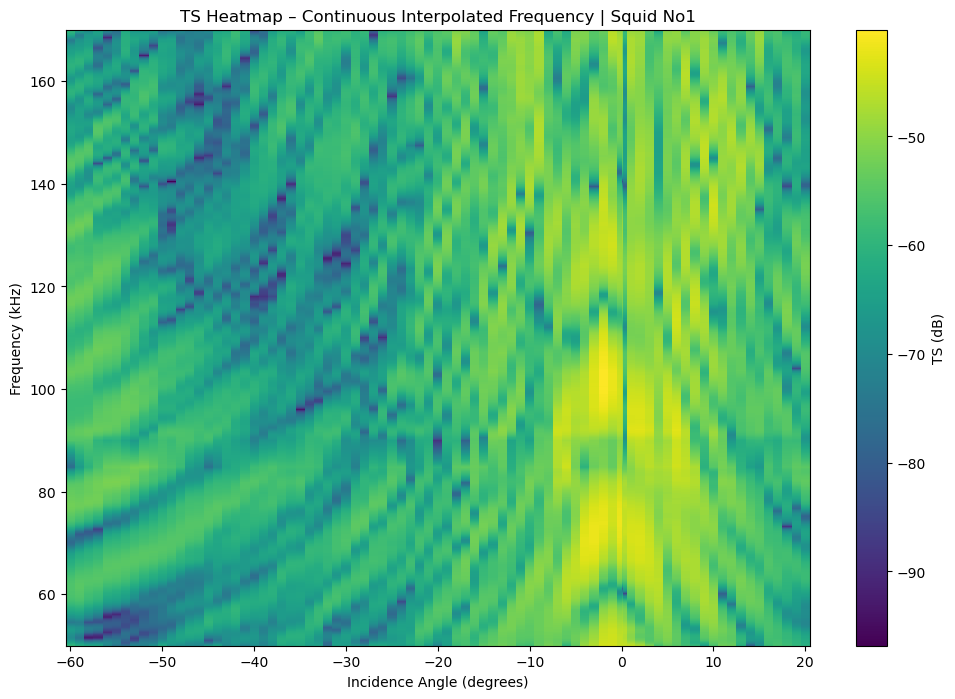

In [25]:
ds = xr.open_dataset("TS_interpolated_0p1kHz.nc")
ts_plot = ds["TS"].sel(squid_id="No1")  # 或 No1

#plt.pcolormesh(ts["angle"], ts["frequency"], ts, shading="auto")

plt.figure(figsize=(12, 8))
pcm = plt.pcolormesh(
ts_plot['angle'],
ts_plot['frequency'],
ts_plot,
shading='auto',
cmap='viridis'
)
plt.xlabel('Incidence Angle (degrees)')
plt.ylabel('Frequency (kHz)')
plt.title('TS Heatmap – Continuous Interpolated Frequency | Squid No1')
plt.colorbar(pcm, label='TS (dB)')
plt.show()


# 插值保存数据方法2，未认真检查

In [12]:
import xarray as xr
import numpy as np

# 输入文件（原始具有 system_freq 的数据）
src_file = "processed_squid_ts.nc"   # 你的原始文件（含 system_freq）
ds_src = xr.open_dataset(src_file)
TS_src = ds_src["TS"]  # dims maybe (squid_id, system_freq, frequency, angle) or (system_freq, frequency, angle, squid_id)

# ensure dims order we expect: (squid_id, system_freq, frequency, angle)
# If different, adapt selectors; here we try a robust selection:
# Try both possibilities:
if 'squid_id' in TS_src.dims and 'system_freq' in TS_src.dims:
    # good
    pass
else:
    raise RuntimeError("TS in source file does not have expected dims (needs squid_id and system_freq). Inspect TS_src.dims: " + str(TS_src.dims))

freq_step = 0.1
all_squid_results = []
squid_ids = TS_src['squid_id'].values
angles = TS_src['angle'].values

for squid in squid_ids:
    print("Processing squid", squid)
    ts_squid = TS_src.sel(squid_id=squid)  # dims (system_freq, frequency, angle)
    # define overall freq_new from this squid's min/max
    fmin = float(ts_squid['frequency'].min().values)
    fmax = float(ts_squid['frequency'].max().values)
    freq_new = np.arange(fmin, fmax + freq_step/2, freq_step)  # include endpoint
    n_f = freq_new.size
    n_a = angles.size

    # container: list of (freq_array, data_array) for each system_freq
    fills = np.full((n_f, n_a), np.nan, dtype=float)
    counts = np.zeros((n_f, n_a), dtype=int)  # to accumulate for averaging

    for sf in ts_squid['system_freq'].values:
        ts_sf = ts_squid.sel(system_freq=sf).transpose('frequency','angle')  # dims (frequency, angle)
        # interpolate ts_sf to freq points **within** its native range
        sf_fmin = float(ts_sf['frequency'].min().values)
        sf_fmax = float(ts_sf['frequency'].max().values)
        mask = (freq_new >= sf_fmin - 1e-9) & (freq_new <= sf_fmax + 1e-9)
        if not np.any(mask):
            continue
        freq_target = freq_new[mask]
        # perform interpolation (xarray interp expects DataArray dim 'frequency')
        ts_sf_interp = ts_sf.interp(frequency=freq_target, method='linear')
        data = ts_sf_interp.values  # shape (len(freq_target), n_a)
        # accumulate into fills (average if multiple systems overlap)
        fills[mask, :] = np.where(np.isfinite(data), np.nan_to_num(fills[mask,:]) + np.nan_to_num(data), fills[mask,:])
        counts[mask, :] += np.isfinite(data).astype(int)

    # finalize average where counts>0
    with np.errstate(invalid='ignore', divide='ignore'):
        avg = np.where(counts>0, fills / counts, np.nan)

    # Now avg contains data wherever at least one system provided values at that freq
    # Next: fill remaining NaNs along frequency axis using linear interpolation per angle
    final = np.full_like(avg, np.nan)
    for j in range(n_a):
        col = avg[:, j]
        good = np.isfinite(col)
        if good.sum() == 0:
            # no data for this angle
            continue
        if good.sum() == 1:
            # single value -> fill with that value across freq (or leave as is)
            # here we fill by nearest for smoother appearance
            final[:, j] = np.interp(freq_new, freq_new[good], col[good])
            continue
        # normal case: interpolate across frequency; this will fill gaps between known points
        final[:, j] = np.interp(freq_new, freq_new[good], col[good])

    # OPTIONAL: if you want to extrapolate beyond the outermost known points, np.interp already fills using endpoints.
    # If you prefer to keep endpoints NaN instead of extrapolating, replace extrapolated regions where original had no data:
    # mask_original_any = np.any(np.isfinite(avg), axis=1)
    # final[~mask_original_any, :] = np.nan

    # create DataArray for this squid: dims ('frequency','angle')
    da = xr.DataArray(final,
                      coords={'frequency': freq_new, 'angle': angles},
                      dims=('frequency','angle'))
    # attach squid_id as coord and expand to squid_id dim
    da = da.expand_dims({'squid_id': [squid]})
    all_squid_results.append(da)

# concat along squid_id
ts_all = xr.concat(all_squid_results, dim='squid_id')

# add attrs and save
ts_all.name = 'TS'
ts_all.attrs['units'] = 'dB'
ts_all.attrs['description'] = f'Interpolated TS, freq step {freq_step} kHz; filled by per-angle linear interp'

out_file = "TS_interpolated_fixed.nc"
ts_all.to_netcdf(out_file)
print("Saved to", out_file)


Processing squid No1
Processing squid No2
Saved to TS_interpolated_fixed.nc


## 读取插值数据直接绘图

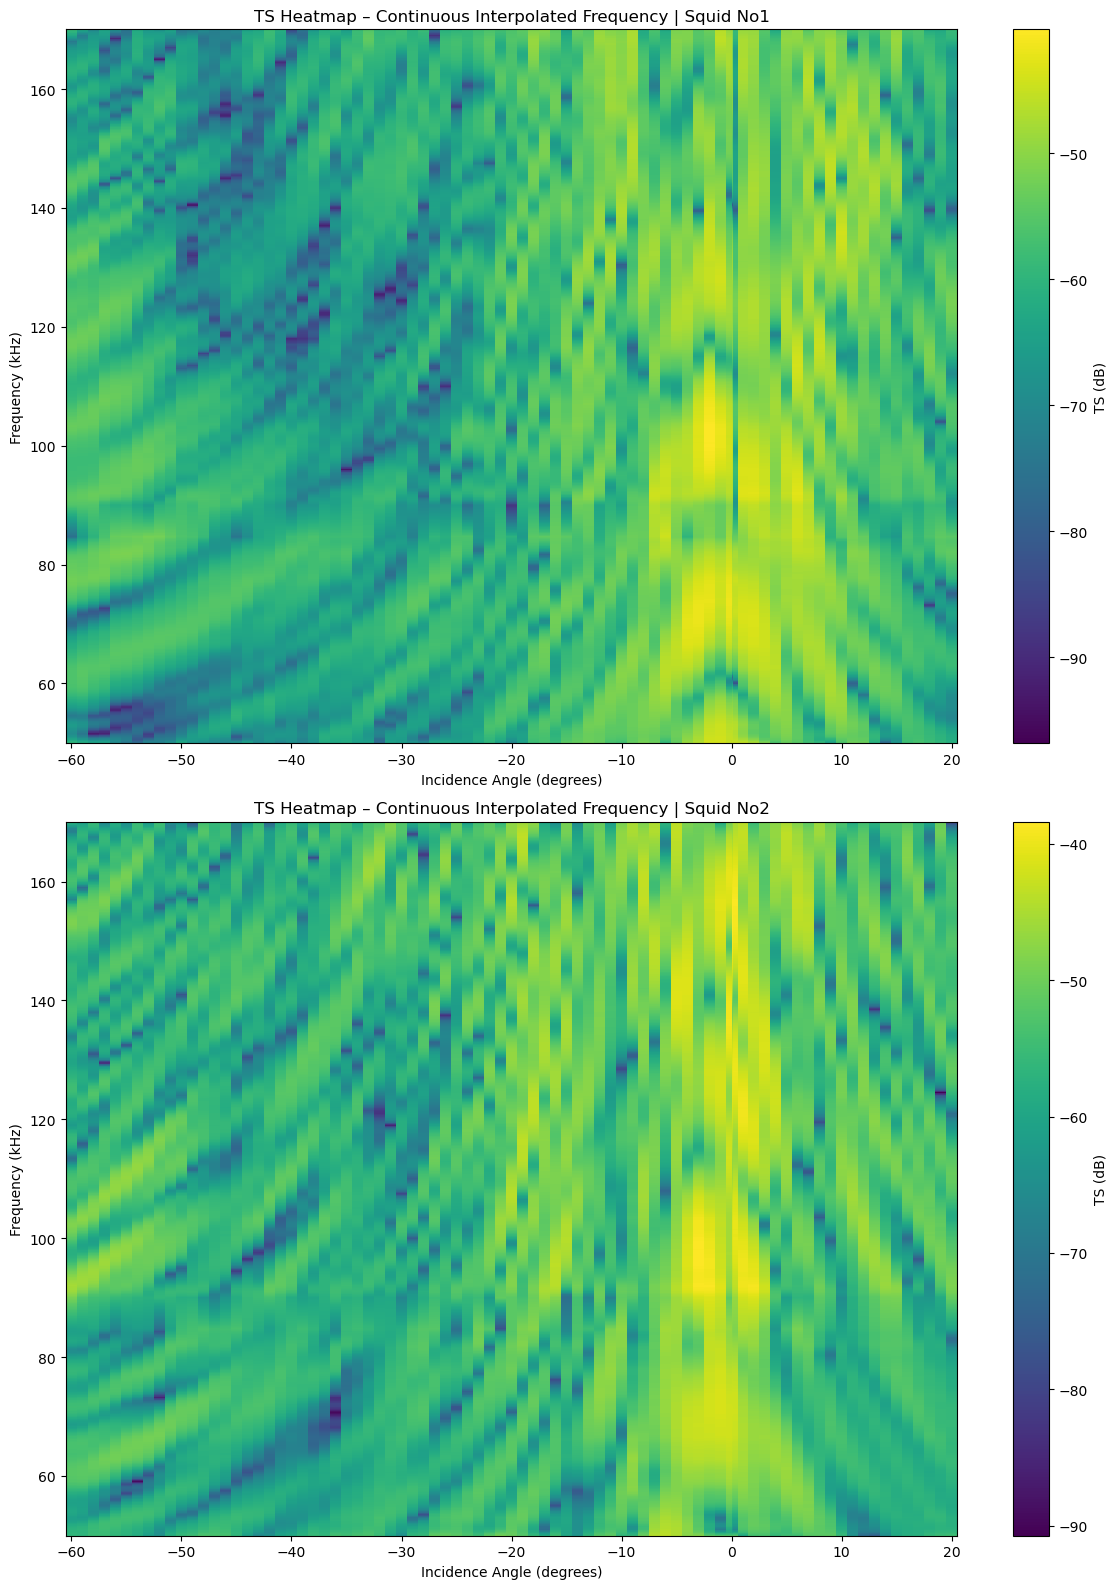

In [26]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

ds = xr.open_dataset("TS_interpolated_fixed.nc")
TS = ds["TS"]  # dims: (squid_id, frequency, angle)

squid_ids = TS['squid_id'].values
n = len(squid_ids)

plt.figure(figsize=(12, 8*n))  # 一个大画布

for i, squid in enumerate(squid_ids, start=1):

    da = TS.sel(squid_id=squid)  # dims: frequency x angle

    freq = da['frequency']
    ang  = da['angle']
    ts_plot = da

    ax = plt.subplot(n, 1, i)  # i-th row

    pcm = ax.pcolormesh(
        ang,
        freq,
        ts_plot,
        shading='auto',
        cmap='viridis'
    )

    ax.set_xlabel("Incidence Angle (degrees)")
    ax.set_ylabel("Frequency (kHz)")
    ax.set_title(f"TS Heatmap – Continuous Interpolated Frequency | Squid {squid}")

    # 每个 subplot 单独一个 colorbar
    cbar = plt.colorbar(pcm, ax=ax, label="TS (dB)")

plt.tight_layout()
plt.show()


# 画出插值的TS

In [16]:
import xarray as xr
import numpy as np

# -----------------------------

# 1. 读取插值后的 NetCDF 文件

# -----------------------------

file_path = 'TS_interpolated.nc'
ds = xr.open_dataset(file_path)

# 假设数据存储为 DataArray 'TS', 维度 (squid_id, frequency, angle)

ts_all = ds['TS']  # shape: (squid_id, frequency, angle)
squid_ids = ts_all['squid_id'].values
freqs = ts_all['frequency'].values

# -----------------------------

# 2. 定义函数检查 NaN

# -----------------------------

def check_nan_frequencies(ts_data, freqs, squid_name):
    """
    检查给定鱿鱼的 TS 数据中哪些频率存在 NaN 值。
    
    参数:
        ts_data (np.ndarray): 形状为 (frequency, angle) 的 TS 数据数组。
        freqs (np.ndarray): 频率数组。
        squid_name (str): 鱿鱼名称或 ID，用于打印输出。
    """
nan_mask = np.isnan(ts_data)  # True 表示 NaN
freqs_with_nan = freqs[np.any(nan_mask, axis=1)]

if len(freqs_with_nan) == 0:
    print(f"[{squid_name}] 所有频率都有有效 TS 数据，没有 NaN\n")
    return

print(f"[{squid_name}] 存在 NaN 的频率及数量：")
for i, freq in enumerate(freqs):
    nan_count = np.sum(nan_mask[i])
    if nan_count > 0:
        print(f"  频率 {freq:.3f} kHz - NaN 数量: {nan_count} / {ts_data.shape[1]}")

# 打印连续 NaN 频率段
print("\n  连续 NaN 频率段：")
start = freqs_with_nan[0]
prev = freqs_with_nan[0]
for f in freqs_with_nan[1:]:
    if f - prev > 1e-6:  # 跳跃，说明段结束
        print(f"    {start:.3f} kHz 到 {prev:.3f} kHz")
        start = f
    prev = f
print(f"    {start:.3f} kHz 到 {prev:.3f} kHz\n")  # 最后一段
```

# -----------------------------

# 3. 遍历每条鱿鱼

# -----------------------------

for i, squid in enumerate(squid_ids):
ts_squid = ts_all.isel(squid_id=i).values  # shape=(frequency, angle)
check_nan_frequencies(ts_squid, freqs, squid_name=str(squid))

# -----------------------------

# 4. 可选：关闭数据集

# -----------------------------

ds.close()


SyntaxError: invalid syntax (3582564308.py, line 57)

In [11]:
# 第 0 条鱿鱼
ts_squid0 = ts_final.isel(squid_id=0)

# 去重 frequency（保留第一个出现的值）
_, unique_idx = np.unique(ts_squid0['frequency'], return_index=True)
ts_squid0_unique = ts_squid0.isel(frequency=unique_idx)

# 取前 20 个频率
freqs_first20 = ts_squid0_unique['frequency'][:20].values
ts_first20 = ts_squid0_unique.sel(frequency=freqs_first20).values

print("前 20 个频率：", freqs_first20)
print("前 20 个频率的 TS 值 (shape={}):".format(ts_first20.shape))
print(ts_first20)


前 20 个频率： [50.  50.1 50.2 50.3 50.4 50.5 50.6 50.7 50.8 50.9 51.  51.1 51.2 51.3
 51.4 51.5 51.6 51.7 51.8 51.9]
前 20 个频率的 TS 值 (shape=(20, 83)):
[[-59.272592   -61.33727    -62.892949   ... -57.802041   -59.521857
  -60.949561  ]
 [-59.98589299 -62.20825056 -64.09510277 ... -57.96560429 -59.63662089
  -61.1223354 ]
 [-60.69919398 -63.07923111 -65.29725654 ... -58.12916759 -59.75138478
  -61.29510981]
 ...
 [-69.26264885 -73.81089233 -90.76618939 ... -59.09778549 -60.88143744
  -63.14548103]
 [-69.08975143 -73.327159   -89.174113   ... -59.12271129 -60.995793
  -63.31075286]
 [-68.91685401 -72.84342567 -87.58203661 ... -59.14763708 -61.11014856
  -63.47602468]]


### 给我写一个脚本，读取@TS_interpolated_fixed.nc 和@TS_interpolated_0p1kHz.nc 画一个图，当频率为120kHz时，鱿鱼的游泳方向为180°时，游泳角度从-60°到20°以1度为步进的5个换能器的游泳TS的变化曲线（先根据游泳方向和角度算出5个换能器对鱿鱼的声波入射角，然后查询该入射角下的TS值）

All datasets loaded successfully.
TS lookup complete.
Plot saved to 'ts_from_lut_plot.png'


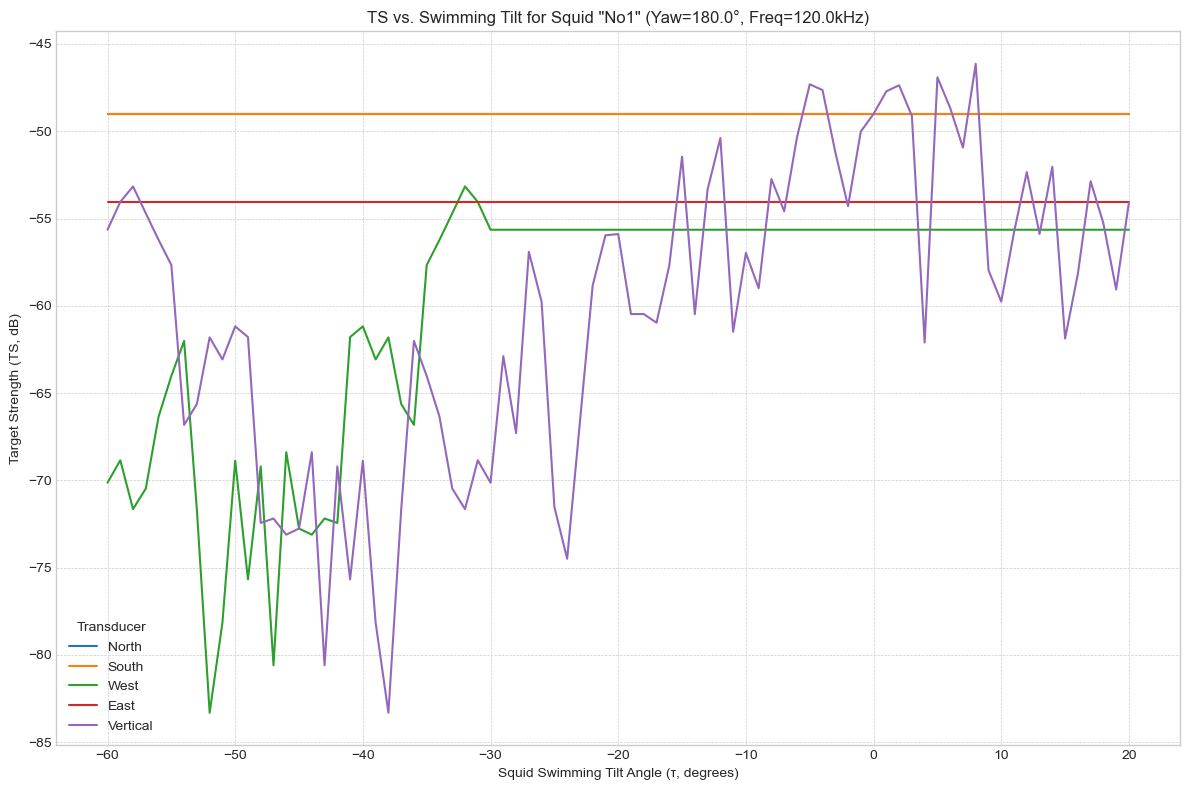

In [27]:

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os

def plot_ts_from_lut():
    """
    Calculates and plots the Target Strength (TS) for a squid at various tilt angles
    by looking up incidence angles from a pre-computed LUT.

    This script reads an incidence angle Look-Up Table (LUT) and a TS data file.
    For a fixed squid swimming direction (yaw=180°) and a range of swimming tilt
    angles (-60° to 20°), it looks up the corresponding incidence angles from the
    LUT. It then uses these angles to find the TS values at 120 kHz from the data
    file and plots the resulting curves.
    """
    # --- 1. Parameters ---
    SQUID_ID = 'No1'
    YAW_DEG = 180.0
    TILT_DEG_RANGE = np.arange(-60, 21, 1)
    FREQUENCY_KHZ = 120.0
    
    LUT_FILE = 'incidence_angle_lut_fixed.nc'
    TS_FILE = 'TS_interpolated_0p1kHz.nc'
    
    # Check if files exist
    if not os.path.exists(LUT_FILE) or not os.path.exists(TS_FILE):
        print(f"Error: One or both input files not found ('{LUT_FILE}', '{TS_FILE}')")
        return

    # --- 2. Load Datasets ---
    try:
        lut_ds = xr.open_dataset(LUT_FILE)
        # The LUT data is stored in the default variable when a DataArray is saved as a Dataset
        lut_da = lut_ds['__xarray_dataarray_variable__']
        ts_ds = xr.open_dataset(TS_FILE)
        print("All datasets loaded successfully.")
    except Exception as e:
        print(f"Error loading datasets: {e}")
        return

    # --- 3. Look Up Incidence Angles and TS ---
    beam_names = lut_da.coords['beam'].values
    results = {name: [] for name in beam_names}
    
    for tilt_deg in TILT_DEG_RANGE:
        # Look up the 5 incidence angles for the given yaw and tilt
        incidence_angles = lut_da.sel(yaw=YAW_DEG, tilt=tilt_deg, method='nearest')
        
        for beam_name in beam_names:
            incidence_angle = incidence_angles.sel(beam=beam_name).item()
            
            # Look up TS value from the TS dataset
            # First, select the squid ID for an exact match
            ts_slice = ts_ds['TS'].sel(squid_id=SQUID_ID)
            # Then, use 'nearest' for both frequency and angle
            ts_val = ts_slice.sel(frequency=FREQUENCY_KHZ, angle=incidence_angle, method='nearest').item()
            
            results[beam_name].append(ts_val)

    lut_ds.close()
    ts_ds.close()
    print("TS lookup complete.")

    # --- 4. Plot Results ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 8))
    
    for beam_name in beam_names:
        ax.plot(TILT_DEG_RANGE, results[beam_name], label=beam_name)

    ax.set_title(f'TS vs. Swimming Tilt for Squid "{SQUID_ID}" (Yaw={YAW_DEG}°, Freq={FREQUENCY_KHZ}kHz)')
    ax.set_xlabel('Squid Swimming Tilt Angle (τ, degrees)')
    ax.set_ylabel('Target Strength (TS, dB)')
    ax.legend(title='Transducer')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    plt.tight_layout()
    
    output_filename = 'ts_from_lut_plot.png'
    plt.savefig(output_filename)
    print(f"Plot saved to '{output_filename}'")
    plt.show()

if __name__ == '__main__':
    plot_ts_from_lut()


# heatmap plotting，横坐标游泳方向，纵坐标游泳角度

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os
import sys

# --- File Paths ---
LUT_FILE = 'incidence_angle_lut_fixed.nc'
TS_FILE = 'TS_interpolated_0p1kHz.nc'

def load_data():
    """Loads the LUT and TS data files and returns the dataset objects."""
    if not os.path.exists(LUT_FILE) or not os.path.exists(TS_FILE):
        print(f"Error: Could not find required data files:\n{LUT_FILE}\n{TS_FILE}")
        return None, None

    try:
        lut_ds = xr.open_dataset(LUT_FILE)
        ts_ds = xr.open_dataset(TS_FILE)
        print("Data loaded successfully.")
        return lut_ds, ts_ds
    except Exception as e:
        print(f"Failed to load or process data files.\nError: {e}")
        return None, None

def generate_and_save_heatmap(lut_da, ts_ds, transducer_name):
    """Generates and saves a TS heatmap for a given transducer."""
    if lut_da is None or ts_ds is None:
        print("Data not loaded. Cannot plot.")
        return

    print(f"Processing for '{transducer_name}'...")

    # --- Parameters for calculation ---
    SQUID_ID = 'No1'
    FREQUENCY_KHZ = 120.0
    DEFAULT_TS = -110.0

    # Define resolution
    YAW_RES = 5
    TILT_RES = 5
    YAW_RANGE = np.arange(0, 361, YAW_RES)
    TILT_RANGE = np.arange(-90, 91, TILT_RES)

    heatmap_data = np.zeros((len(TILT_RANGE), len(YAW_RANGE)))

    # --- Main Processing Loop ---
    min_angle = ts_ds.coords['angle'].min().item()
    max_angle = ts_ds.coords['angle'].max().item()

    for i, tilt_deg in enumerate(TILT_RANGE):
        # Add a simple progress indicator
        sys.stdout.write(f"\r  Calculating... Tilt: {tilt_deg:>3}°")
        sys.stdout.flush()
        for j, yaw_deg in enumerate(YAW_RANGE):
            incidence_angle = lut_da.sel(
                yaw=yaw_deg, tilt=tilt_deg, method='nearest'
            ).sel(
                beam=transducer_name
            ).item()

            if min_angle <= incidence_angle <= max_angle:
                ts_slice = ts_ds['TS'].sel(squid_id=SQUID_ID)
                ts_val = ts_slice.sel(
                    frequency=FREQUENCY_KHZ, angle=incidence_angle, method='nearest'
                ).item()
            else:
                ts_val = DEFAULT_TS
            heatmap_data[i, j] = ts_val
    
    print("\nPlotting...")

    # --- Plotting ---
    fig, ax = plt.subplots(figsize=(12, 8))
    # Using a consistent color range for better comparison across plots
    im = ax.imshow(heatmap_data, extent=[0, 360, -90, 90], origin='lower', aspect='auto', cmap='jet', vmin=-80, vmax=-30)
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label('Target Strength (TS, dB)')

    ax.set_title(f'TS Heatmap for "{transducer_name}" Transducer')
    ax.set_xlabel('Swimming Direction (Yaw, degrees)')
    ax.set_ylabel('Swimming Angle (Tilt, degrees)')
    
    # Set explicit ticks
    ax.set_xticks(np.arange(0, 361, 45))
    ax.set_yticks(np.arange(-90, 91, 30))
    ax.grid(True, linestyle='--', alpha=0.6)

    # Save the figure
    output_filename = f'ts_heatmap_{transducer_name}.png'
    fig.savefig(output_filename, dpi=150, bbox_inches='tight')
    plt.close(fig) # Close the figure to free memory
    print(f"Heatmap saved to {output_filename}\n")


def main():
    """Main function to generate all heatmaps."""
    lut_ds, ts_ds = load_data()

    if lut_ds is None or ts_ds is None:
        return

    try:
        # The data variable name might be different, find it dynamically
        data_vars = list(lut_ds.data_vars)
        if not data_vars:
            print(f"Error: No data variables found in {LUT_FILE}")
            return
        lut_da = lut_ds[data_vars[0]]

        # Get the list of transducers (beams)
        transducer_names = lut_da.coords['beam'].values.tolist()
        print(f"Found transducers: {transducer_names}")

        for name in transducer_names:
            generate_and_save_heatmap(lut_da, ts_ds, name)
    
    finally:
        # Close datasets
        if ts_ds is not None:
            ts_ds.close()
        if lut_ds is not None:
            lut_ds.close()

    print("All heatmaps generated.")


if __name__ == '__main__':
    main()
